In [7]:
from platform import python_version

print('Versão da Linguagem Python usada neste curso é: ', python_version())


Versão da Linguagem Python usada neste curso é:  3.11.5


In [8]:
import sqlite3
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import pyodbc
import mysql
import mysql.connector

In [9]:
sqlite3.sqlite_version

'3.41.2'

In [10]:
pd.__version__

'2.0.3'

In [11]:
sqlalchemy.__version__

'1.4.39'

In [12]:
psycopg2.__version__

'2.9.10 (dt dec pq3 ext lo64)'

In [13]:
import pkg_resources
print(pkg_resources.get_distribution("pyodbc").version)

4.0.34


In [14]:
mysql.connector.__version__

'9.2.0'

In [15]:
import sqlite3

conn = sqlite3.connect('cap12_dsa.db')

cursor = conn.cursor()

sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)

tabelas = cursor.fetchall()
print(tabelas)

[('tb_vendas_dsa',)]


In [16]:
query1 = 'SELECT * FROM tb_vendas_dsa'

In [17]:
cursor.execute(query1)

In [18]:
nomes_colunas = [description[0] for description in cursor.description]

In [19]:
print(nomes_colunas)

['ID_Pedido', 'ID_Cliente', 'Nome_Produto', 'Valor_Unitario', 'Unidades_Vendidas', 'Custo']


In [20]:
dados = cursor.fetchall()

In [22]:
dados

[(1, 63, 'Produto_38', 154.03, 7, 92.42),
 (2, 49, 'Produto_8', 171.52, 5, 102.91),
 (3, 83, 'Produto_39', 28.97, 13, 17.38),
 (4, 37, 'Produto_2', 104.55, 4, 62.73),
 (5, 19, 'Produto_1', 77.21, 19, 46.33),
 (6, 87, 'Produto_36', 161.97, 13, 97.18),
 (7, 59, 'Produto_24', 101.17, 7, 60.7),
 (8, 48, 'Produto_31', 92.03, 9, 55.22),
 (9, 73, 'Produto_4', 116.57, 6, 69.94),
 (10, 98, 'Produto_45', 46.16, 4, 27.7),
 (11, 86, 'Produto_30', 135.55, 12, 81.33),
 (12, 89, 'Produto_45', 119.4, 11, 71.64),
 (13, 96, 'Produto_11', 96.63, 13, 57.98),
 (14, 29, 'Produto_50', 191.3, 10, 114.78),
 (15, 63, 'Produto_21', 191.28, 14, 114.77),
 (16, 30, 'Produto_22', 67.58, 17, 40.55),
 (17, 5, 'Produto_41', 33.22, 2, 19.93),
 (18, 97, 'Produto_33', 67.77, 12, 40.66),
 (19, 19, 'Produto_18', 160.68, 15, 96.41),
 (20, 7, 'Produto_17', 34.37, 13, 20.62),
 (21, 79, 'Produto_1', 161.33, 15, 96.8),
 (22, 36, 'Produto_45', 184.7, 11, 110.82),
 (23, 94, 'Produto_21', 11.57, 1, 6.94),
 (24, 51, 'Produto_16', 10

In [21]:
# Retorna a media das unidades negociados 
query2 = 'SELECT AVG(Unidades_Vendidas)FROM tb_vendas_dsa '

In [22]:
# Executa a quey no Banco de dados
cursor.execute(query2)

In [23]:
resultado = cursor.fetchall()

In [24]:
print(resultado)

[(10.506,)]


In [25]:
# Media  das unidades vendidas por serviço
query3 = 'SELECT Nome_Produto, AVG(Unidades_Vendidas) FROM tb_vendas_dsa GROUP BY Nome_Produto'

In [26]:
# Executa a quey no Banco de dados
cursor.execute(query3)

In [27]:
resultado = cursor.fetchall()

In [28]:
for row in resultado:
    print(row)

('Produto_1', 12.0)
('Produto_10', 9.5)
('Produto_11', 14.181818181818182)
('Produto_12', 8.846153846153847)
('Produto_13', 6.0)
('Produto_14', 9.166666666666666)
('Produto_15', 9.75)
('Produto_16', 8.25)
('Produto_17', 11.714285714285714)
('Produto_18', 13.083333333333334)
('Produto_19', 9.727272727272727)
('Produto_2', 9.25)
('Produto_20', 7.555555555555555)
('Produto_21', 10.285714285714286)
('Produto_22', 13.6875)
('Produto_23', 10.818181818181818)
('Produto_24', 12.272727272727273)
('Produto_25', 9.538461538461538)
('Produto_26', 9.363636363636363)
('Produto_27', 11.1)
('Produto_28', 9.0)
('Produto_29', 9.692307692307692)
('Produto_3', 8.909090909090908)
('Produto_30', 9.875)
('Produto_31', 7.9)
('Produto_32', 11.923076923076923)
('Produto_33', 12.285714285714286)
('Produto_34', 8.1)
('Produto_35', 9.0)
('Produto_36', 9.090909090909092)
('Produto_37', 11.0)
('Produto_38', 12.8)
('Produto_39', 12.666666666666666)
('Produto_4', 11.153846153846153)
('Produto_40', 7.25)
('Produto_41',

In [29]:
# query pra retornar a media da unidade vendidas por serviços maior que 199
query4 = """ SELECT Nome_Produto, AVG(Unidades_Vendidas)
             FROM tb_vendas_dsa 
             WHERE Valor_Unitario > 199
             GROUP BY Nome_Produto"""

In [30]:
cursor.execute(query4)

In [31]:
resultado = cursor.fetchall()

In [32]:
for nome_produto, media_vendas in resultado:
    print(f"Produto: {nome_produto} | Média de Unidades Vendidas: {media_vendas:.2f}")

Produto: Produto_11 | Média de Unidades Vendidas: 1.00
Produto: Produto_15 | Média de Unidades Vendidas: 8.00
Produto: Produto_17 | Média de Unidades Vendidas: 14.00
Produto: Produto_20 | Média de Unidades Vendidas: 7.00
Produto: Produto_39 | Média de Unidades Vendidas: 16.00


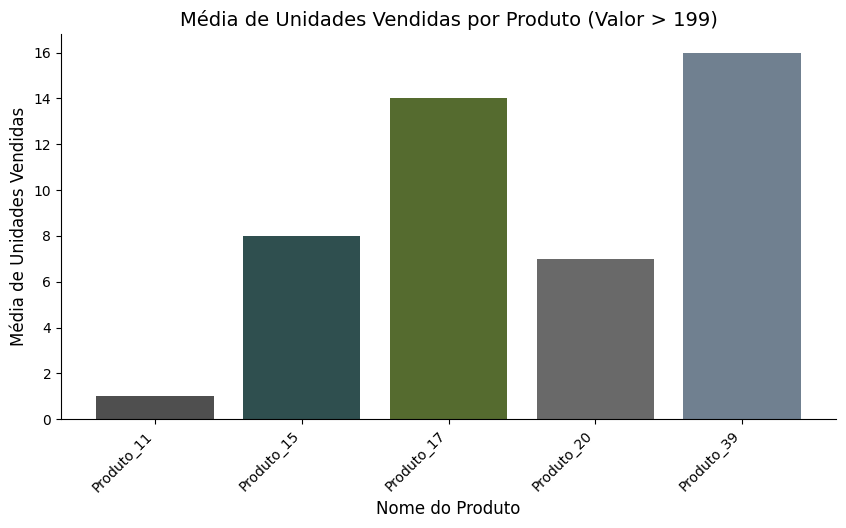

In [33]:
import matplotlib.pyplot as plt

# Executar a consulta SQL
query4 = """ SELECT Nome_Produto, AVG(Unidades_Vendidas)
             FROM tb_vendas_dsa 
             WHERE Valor_Unitario > 199
             GROUP BY Nome_Produto """
cursor.execute(query4)
resultado = cursor.fetchall()

# Separar os dados em listas
produtos = [row[0] for row in resultado]  # Nomes dos produtos
medias_vendas = [row[1] for row in resultado]  # Médias de unidades vendidas

# Criar o gráfico de barras com cores sóbrias
plt.figure(figsize=(10, 5))  # Tamanho do gráfico
cores_sobrias = ["#4F4F4F", "#2F4F4F", "#556B2F", "#696969", "#708090"]  # Cinza, azul escuro, verde escuro

plt.bar(produtos, medias_vendas, color=cores_sobrias[:len(produtos)])  # Aplicar cores

# Personalizar o gráfico
plt.xlabel("Nome do Produto", fontsize=12, color="black")
plt.ylabel("Média de Unidades Vendidas", fontsize=12, color="black")
plt.title("Média de Unidades Vendidas por Produto (Valor > 199)", fontsize=14, color="black")
plt.xticks(rotation=45, ha="right", fontsize=10, color="black")  # Rotacionar rótulos do eixo X

# Remover bordas desnecessárias
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Exibir o gráfico
plt.show()

In [34]:
# Criar uma clasula sql para calcular a media de unidades vendidas por produto quando o valor for maior que 199
# mais somente se a media de unidades vendidas for maior do que 10
query5 = """
    SELECT Nome_Produto, AVG(Unidades_Vendidas) AS Media_Vendas
    FROM tb_vendas_dsa
    WHERE Valor_Unitario > 199
    GROUP BY Nome_Produto
    HAVING AVG(Unidades_Vendidas) > 10;
"""

# Executar a consulta
cursor.execute(query5)

# Obter os resultados
resultado = cursor.fetchall()

# Exibir os resultados
for row in resultado:
    print(row)


('Produto_17', 14.0)
('Produto_39', 16.0)


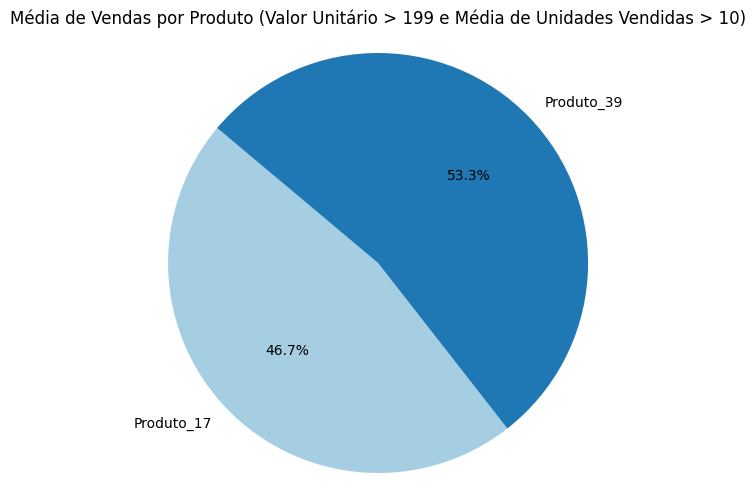

In [35]:
import matplotlib.pyplot as plt
import sqlite3  # Ou use a biblioteca correspondente ao seu banco de dados, como MySQL ou PostgreSQL

# Consulta SQL para calcular a média de unidades vendidas por produto
query5 = """
    SELECT Nome_Produto, AVG(Unidades_Vendidas) AS Media_Vendas
    FROM tb_vendas_dsa
    WHERE Valor_Unitario > 199
    GROUP BY Nome_Produto
    HAVING AVG(Unidades_Vendidas) > 10;
"""

# Executar a consulta
cursor.execute(query5)

# Obter os resultados
resultado = cursor.fetchall()

# Separando os dados para o gráfico
produtos = [row[0] for row in resultado]
media_vendas = [row[1] for row in resultado]

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(media_vendas, labels=produtos, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Média de Vendas por Produto (Valor Unitário > 199 e Média de Unidades Vendidas > 10)')
plt.axis('equal')  # Para garantir que o gráfico seja desenhado como um círculo
plt.show()


In [37]:
cursor.close
conn.close

<function Connection.close()>

In [38]:
con = sqlite3.connect('cap12_dsa.db')

In [39]:
cursor = con.cursor()

In [41]:
import sqlite3  # Ou use a biblioteca correspondente ao seu banco de dados, como MySQL ou PostgreSQL
import pandas as pd
# Consulta SQL usando Pandas
#query1 = 'SELECT * FROM tb_vendas_dsa'

# Carregar os dados diretamente no DataFrame do Pandas
df = pd.read_sql_query(query1, con)

# Exibir as primeiras linhas do DataFrame
print(df.head())

cursor.close
con.close

   ID_Pedido  ID_Cliente Nome_Produto  Valor_Unitario  Unidades_Vendidas  \
0          1          63   Produto_38          154.03                  7   
1          2          49    Produto_8          171.52                  5   
2          3          83   Produto_39           28.97                 13   
3          4          37    Produto_2          104.55                  4   
4          5          19    Produto_1           77.21                 19   

    Custo  
0   92.42  
1  102.91  
2   17.38  
3   62.73  
4   46.33  


<function Connection.close()>

In [42]:
#query2 = 'SELECT AVG(Unidades_Vendidas)FROM tb_vendas_dsa '
# Calculando a média da coluna 'Unidades_Vendidas'
media_unidades_vendidas = df['Unidades_Vendidas'].mean()

print("Média das unidades vendidas:", media_unidades_vendidas)

cursor.close
con.close


Média das unidades vendidas: 10.506


<function Connection.close()>

In [43]:
#query3 = 'SELECT Nome_Produto, AVG(Unidades_Vendidas) FROM tb_vendas_dsa GROUP BY Nome_Produto'

# Agrupando por 'Nome_Produto' e calculando a média de 'Unidades_Vendidas'
resultado = df.groupby('Nome_Produto')['Unidades_Vendidas'].mean().reset_index()

print(resultado)

cursor.close
con.close

   Nome_Produto  Unidades_Vendidas
0     Produto_1          12.000000
1    Produto_10           9.500000
2    Produto_11          14.181818
3    Produto_12           8.846154
4    Produto_13           6.000000
5    Produto_14           9.166667
6    Produto_15           9.750000
7    Produto_16           8.250000
8    Produto_17          11.714286
9    Produto_18          13.083333
10   Produto_19           9.727273
11    Produto_2           9.250000
12   Produto_20           7.555556
13   Produto_21          10.285714
14   Produto_22          13.687500
15   Produto_23          10.818182
16   Produto_24          12.272727
17   Produto_25           9.538462
18   Produto_26           9.363636
19   Produto_27          11.100000
20   Produto_28           9.000000
21   Produto_29           9.692308
22    Produto_3           8.909091
23   Produto_30           9.875000
24   Produto_31           7.900000
25   Produto_32          11.923077
26   Produto_33          12.285714
27   Produto_34     

<function Connection.close()>

In [44]:
#query4 = """ SELECT Nome_Produto, AVG(Unidades_Vendidas)
#             FROM tb_vendas_dsa 
#             WHERE Valor_Unitario > 199
#             GROUP BY Nome_Produto"""

# Filtrando os produtos com 'Valor_Unitario' maior que 199
df_filtrado = df[df['Valor_Unitario'] > 199]

# Agrupando por 'Nome_Produto' e calculando a média de 'Unidades_Vendidas'
resultado = df_filtrado.groupby('Nome_Produto')['Unidades_Vendidas'].mean().reset_index()

print(resultado)

cursor.close
con.close

  Nome_Produto  Unidades_Vendidas
0   Produto_11                1.0
1   Produto_15                8.0
2   Produto_17               14.0
3   Produto_20                7.0
4   Produto_39               16.0


<function Connection.close()>

In [46]:
import pandas as pd

# query5 = """
#    SELECT Nome_Produto, AVG(Unidades_Vendidas) AS Media_Vendas
#    FROM tb_vendas_dsa
#    WHERE Valor_Unitario > 199
#    GROUP BY Nome_Produto
#    HAVING AVG(Unidades_Vendidas) > 10;
#"""

# Filtra os dados onde o Valor_Unitario é maior que 199
filtered_df = df[df['Valor_Unitario'] > 199]

# Agrupa por Nome_Produto e calcula a média de Unidades_Vendidas
grouped_df = filtered_df.groupby('Nome_Produto')['Unidades_Vendidas'].mean()

# Filtra os grupos com média de vendas maior que 10
result_df = grouped_df[grouped_df > 10]

# Para exibir o resultado com o nome do produto e a média de vendas
result_df = result_df.reset_index(name='Media_Vendas')

print(result_df)

cursor.close
con.close

  Nome_Produto  Media_Vendas
0   Produto_17          14.0
1   Produto_39          16.0


<function Connection.close()>

In [48]:
# alternativa A
df [df['Valor_Unitario'] > 199].groupby('Nome_Produto').filter(lambda x: x['Unidades_Vendidas'].mean() > 10)

,ID_Pedido,ID_Cliente,Nome_Produto,Valor_Unitario,Unidades_Vendidas,Custo
42,43,72,Produto_39,199.78,16,119.87
83,84,45,Produto_17,199.62,14,119.77


In [50]:
df[df['Valor_Unitario'] > 199] \
    .groupby('Nome_Produto') \
    .filter(lambda x: x['Unidades_Vendidas'].mean() > 10) \
    .groupby('Nome_Produto')['Unidades_Vendidas'] \
    .mean()                                                        

Nome_Produto
Produto_17    14.0
Produto_39    16.0
Name: Unidades_Vendidas, dtype: float64

In [51]:
df[df['Valor_Unitario'] > 199] \
    .groupby('Nome_Produto') \
    .filter(lambda x: x['Unidades_Vendidas'].mean() > 10) \
    .groupby('Nome_Produto')['Unidades_Vendidas'] \
    .mean()

Nome_Produto
Produto_17    14.0
Produto_39    16.0
Name: Unidades_Vendidas, dtype: float64